# **INF4039 Deep Learning Systems**
## Laboratory work No.2
### Prepared by: Bohdan Zhyhun (IF2000102)

## **Task 1**
Prepare "Titanic.csv" dataset for deep learning. Explain in report (or notebook) what actions you did and why.



###Step 1: Data Loading and Exploration
We will load the data, explore its initial rows, and check basic statistics and information about the dataset.

In [31]:
# Mont Google drive and configure the path to the "Titanic.csv"
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive/Deep_learning/Titanic.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Install pandas
!pip install pandas

In [33]:
import pandas as pd


In [34]:
# Upload the dataset
titanic_data = pd.read_csv(BASE_PATH)

In [39]:
# Display the first few rows of the dataset
titanic_head = titanic_data.head()

# Display basic information about the dataset
titanic_info = titanic_data.info()

# Display basic statistics about the dataset
titanic_describe = titanic_data.describe()

(titanic_head, titanic_info, titanic_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex       Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  0.271174      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229      1   
 2                             Heikkinen, Miss. Laina  female  0.321438      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
 4                           Allen, Mr. William Henry    male  0.434531      0   
 
    Parch            Ticket      Fare Cabin Embarked  
 0      0         A/5 21171  0.014151   NaN        S  
 1      0          PC 17599  0.139136   C85        C  
 2      0  STON/O2. 3101282  0.015469   NaN        S  
 3      0            113803  0.103644  C123        S  
 4     

###**Exploration Results**:
General Data Info

*   Total Entries: 891
*   Attributes:
    *   Numerical: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare
    *   Categorical: Name, Sex, Ticket, Cabin, Embarked
* Memory Usage: 83.7+ KB

Missing Values
* Age: 714 non-null (177 missing)
* Cabin: 204 non-null (687 missing)
* Embarked: 889 non-null (2 missing)

Basic Statistics

* Age: Range from 0.42 to 80, mean is approximately 30.
* Fare: Highly varied, with a minimum of 0 and a maximum of 512.33.
* SibSp & Parch: Range from 0 to 8 and 6 respectively, indicating the number of siblings/spouses and parents/children aboard

###Step 2: Handling Missing Values
Strategies

* Age: Impute missing values using the median.
* Cabin:  A large portion of this data is missing. So we will delete this values
* Embarked: Impute with the most common embarkation point.


In [40]:
# Age: Impute with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
# Delete 'Cabin'
titanic_data = titanic_data.drop(columns=['Cabin'])
# Embarked: Impute with most common point
most_common_embarkation_point = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(most_common_embarkation_point, inplace=True)

In [41]:
# Check if there are any more missing values
missing_values_after = titanic_data.isnull().sum()

missing_values_after

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###Step 2 Results:
All missing values in **Age** and **Embarked** have been dealt with accordingly. The **Cabin** column has been removed

###Step 3: Correlations
We'll analyze the correlation between different variables, particularly focusing on how various features correlate with the target variable **Survived**. We'll calculate the Pearson correlation coefficient, which gives an idea about the linear relationship between variables.



In [42]:
#import
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [43]:
# Temporarily encode 'Sex' and 'Embarked' for correlation analysis
label_encoder = LabelEncoder()
titanic_data_temp = titanic_data.copy()
titanic_data_temp['Sex'] = label_encoder.fit_transform(titanic_data_temp['Sex'])
titanic_data_temp['Embarked'] = label_encoder.fit_transform(titanic_data_temp['Embarked'])


In [44]:
# Calculate the correlation matrix
correlation_matrix = titanic_data_temp.corr()

<ipython-input-44-b5d621c3639b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data_temp.corr()


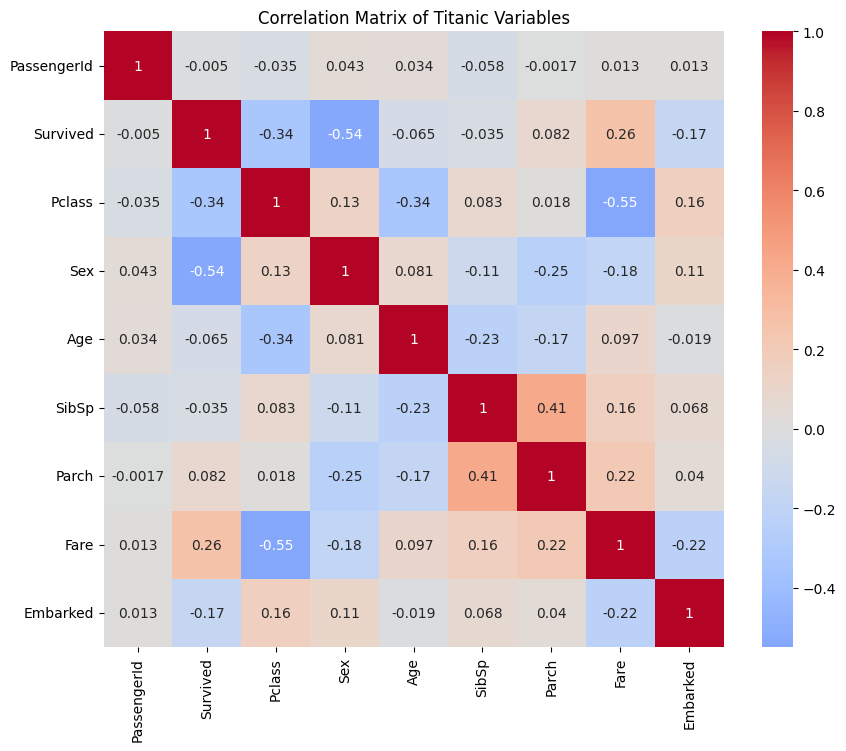

In [45]:
# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Titanic Variables')
plt.show()

In [46]:
# Display the correlation coefficients of all variables with 'Survived'
correlation_with_survived = correlation_matrix['Survived'].sort_values(ascending=False)
correlation_with_survived

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

###Step 3 Results: Correlations
The heatmap above provides a visual representation of the correlation between different variables. The values range from -1 to 1, where:

* 1 indicates a perfect positive correlation.
* -1 indicates a perfect negative correlation.
* 0 indicates no linear correlation.

Some notable points:

* Survived & Pclass: There's a notable negative correlation (-0.338), implying that passenger class affects the survival rate. Likely, 1st class passengers had a higher survival rate.
* Pclass & Fare: Not surprisingly, there's a significant negative correlation (-0.549) between passenger class and fare. First-class tickets are more expensive.


### Step 4: Normalize Data
Normalization rescales the values into a range of [0,1]. This might be useful for algorithms that use distance computations or for databases with columns that have different units.

Strategy:
Normalize continuous variables: "Age" and "Fare".
Ensure that the resulting distribution of the normalized variables is as expected.

In [47]:
from sklearn.preprocessing import MinMaxScaler
# Selecting continuous variables to normalize
continuous_vars = ['Age', 'Fare']
data_to_normalize = titanic_data[continuous_vars]

# Normalizing
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data_to_normalize), columns=continuous_vars)

# Updating the original dataset with normalized data
titanic_data[continuous_vars] = normalized_data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,S


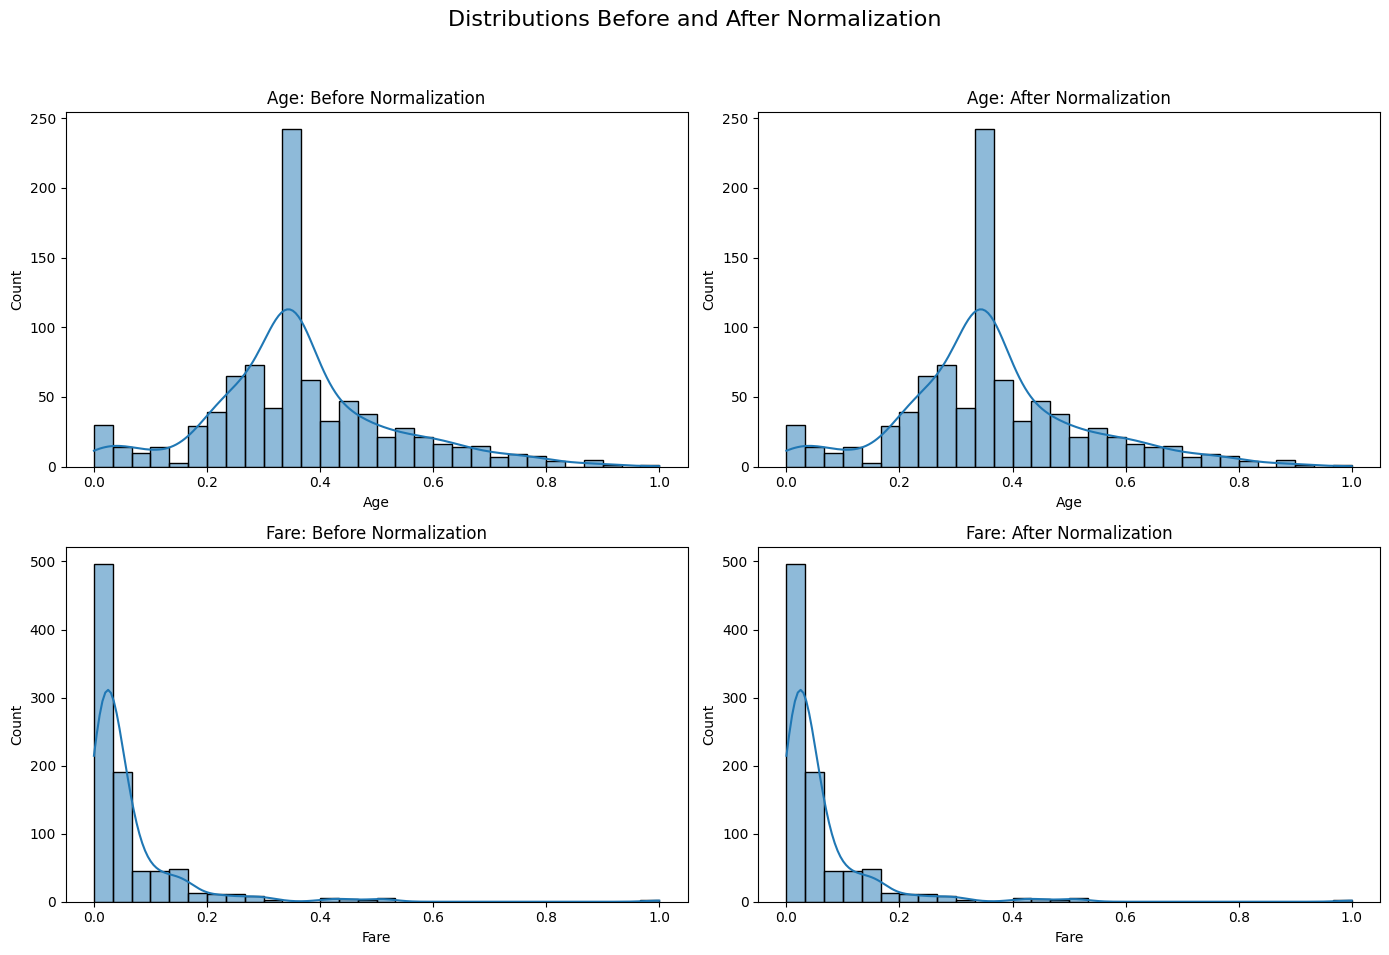

In [48]:
# Visualization: Distributions before and after normalization
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Distributions Before and After Normalization', fontsize=16)

# Before Normalization: Age
sns.histplot(data_to_normalize['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age: Before Normalization')

# After Normalization: Age
sns.histplot(normalized_data['Age'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age: After Normalization')

# Before Normalization: Fare
sns.histplot(data_to_normalize['Fare'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Fare: Before Normalization')

# After Normalization: Fare
sns.histplot(normalized_data['Fare'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Fare: After Normalization')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###Step 5: Check for Outliers and Remove them
Outliers can be observed using various visualization techniques such as box plots or scatter plots. Additionally, statistical methods (like Z-score or IQR) can be used to identify and handle outliers.

Strategy:

* Visualize potential outliers using box plots for "Age" and "Fare".
* Apply the IQR method to statistically identify outliers.
* Decide whether to retain


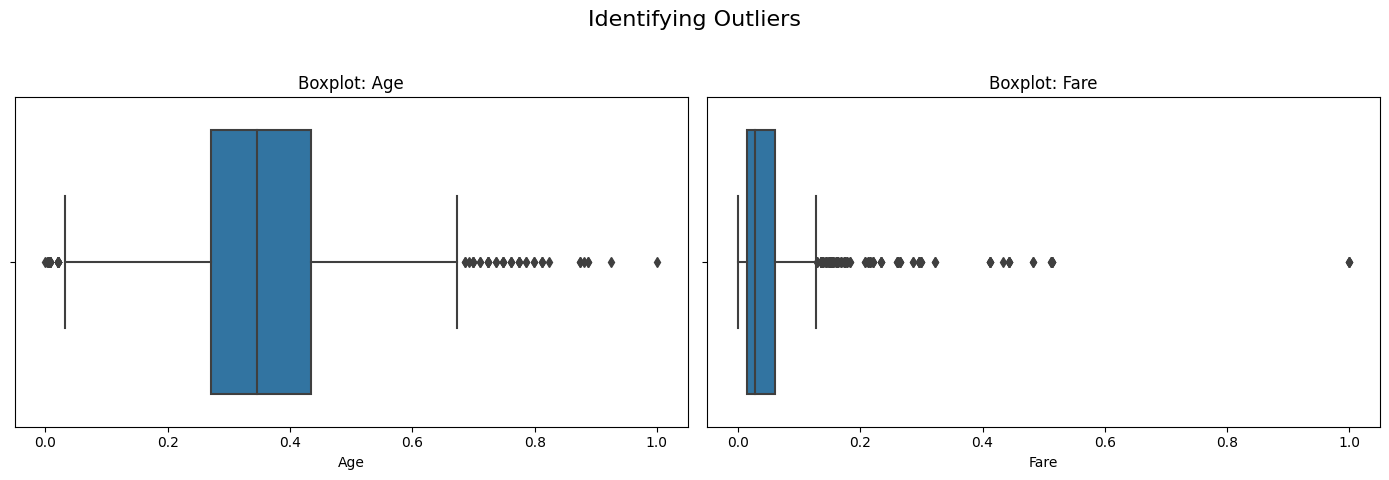

In [49]:
# Visualizing potential outliers using box plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.suptitle('Identifying Outliers', fontsize=16)

# Boxplot: Age
sns.boxplot(x=titanic_data['Age'], ax=axes[0])
axes[0].set_title('Boxplot: Age')

# Boxplot: Fare
sns.boxplot(x=titanic_data['Fare'], ax=axes[1])
axes[1].set_title('Boxplot: Fare')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [50]:
# Applying the IQR method to statistically identify outliers
Q1 = titanic_data[continuous_vars].quantile(0.25)
Q3 = titanic_data[continuous_vars].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((titanic_data[continuous_vars] < (Q1 - 1.5 * IQR)) | (titanic_data[continuous_vars] > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()

# Displaying the count of identified outliers per variable
outliers_count


Age      66
Fare    116
dtype: int64

In [51]:
# Removing outliers
titanic_data_no_outliers = titanic_data[~outliers.any(axis=1)]

# Verification: Shape of data before and after removal of outliers
data_shape_before = titanic_data.shape
data_shape_after = titanic_data_no_outliers.shape



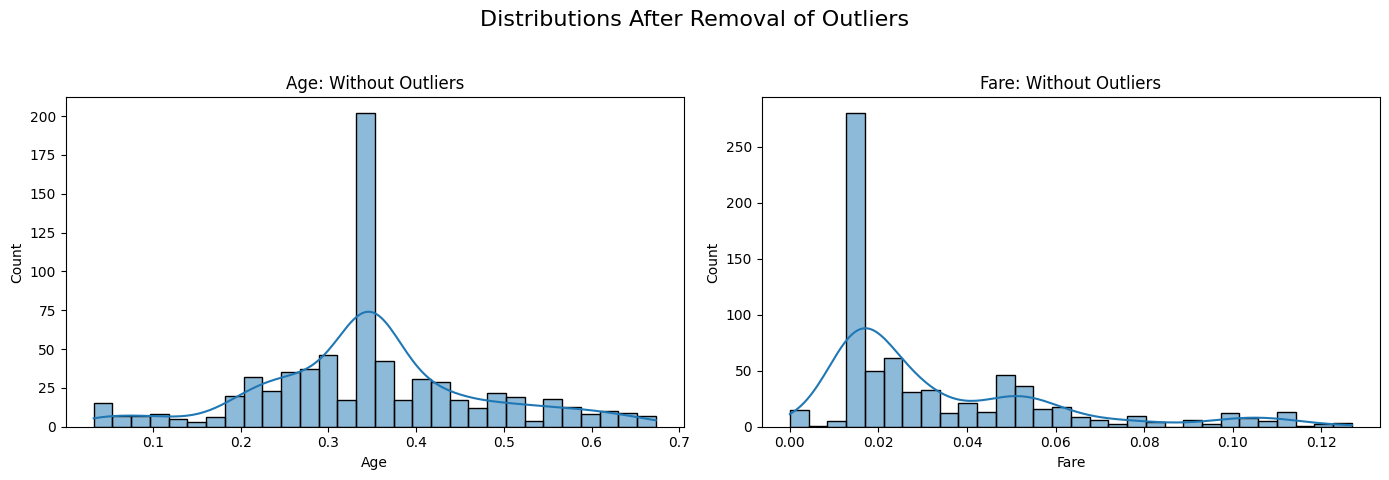

In [52]:
# Visualization: Distributions after removal of outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
fig.suptitle('Distributions After Removal of Outliers', fontsize=16)

# Age
sns.histplot(titanic_data_no_outliers['Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age: Without Outliers')

# Fare
sns.histplot(titanic_data_no_outliers['Fare'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Fare: Without Outliers')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [53]:
# Displaying data shapes and updated data without outliers
data_shape_before, data_shape_after, titanic_data_no_outliers.head()

((891, 11),
 (721, 11),
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 5            6         0       3   
 
                                            Name     Sex       Age  SibSp  \
 0                       Braund, Mr. Owen Harris    male  0.271174      1   
 2                        Heikkinen, Miss. Laina  female  0.321438      0   
 3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531      1   
 4                      Allen, Mr. William Henry    male  0.434531      0   
 5                              Moran, Mr. James    male  0.346569      0   
 
    Parch            Ticket      Fare Embarked  
 0      0         A/5 21171  0.014151        S  
 2      0  STON/O2. 3101282  0.015469        S  
 3      0            113803  0.103644        S  
 4      0            373450  0.015713        S  
 5      0            330877  0.016510      

Outliers from the "Age" and "Fare" variables have been removed successfully. The dataset was reduced from
891 to 721 entries, indicating the removal of
170 outlier entries.



### Step 6: Train/Test Split
Splitting the dataset into training and testing subsets ensures that the model can be evaluated on unseen data, providing insights into its likely performance on new data in a production environment.

Strategy:
* Separate the independent variables (features) and the dependent variable (target) from the data.
* Split the data into training and testing sets. A common ratio is 80/20 for training/testing.


In [54]:
from sklearn.model_selection import train_test_split

# Separate features and target
features = titanic_data_no_outliers.drop('Survived', axis=1)
target = titanic_data_no_outliers['Survived']

# Splitting the data into train and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Verifying the shapes of the resulting sets
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((576, 10), (145, 10)), ((576,), (145,)))

###Step 7: Save to File
We will save the cleaned and pre-processed datasets to CSV files for future use

In [55]:
# Concatenating the training features and target, and saving to CSV
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('/content/drive/MyDrive/Deep_learning/titanic_train_cleaned.csv', index=False)

# Concatenating the testing features and target, and saving to CSV
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('/content/drive/MyDrive/Deep_learning/titanic_test_cleaned.csv', index=False)

# Verification: Displaying the first few rows of the cleaned train and test data
train_data.head(), test_data.head()

(     PassengerId  Pclass                         Name     Sex       Age  \
 563          564       3            Simmons, Mr. John    male  0.346569   
 443          444       2    Reynaldo, Ms. Encarnacion  female  0.346569   
 471          472       3              Cacic, Mr. Luka    male  0.472229   
 177          178       1   Isham, Miss. Ann Elizabeth  female  0.623021   
 259          260       2  Parrish, Mrs. (Lutie Davis)  female  0.623021   
 
      SibSp  Parch           Ticket      Fare Embarked  Survived  
 563      0      0  SOTON/OQ 392082  0.015713        S         0  
 443      0      0           230434  0.025374        S         1  
 471      0      0           315089  0.016908        S         0  
 177      0      0         PC 17595  0.056043        C         0  
 259      0      1           230433  0.050749        S         1  ,
      PassengerId  Pclass                          Name     Sex       Age  \
 322          323       2     Slayter, Miss. Hilda Mary  femal

## **Task 2**
Prepare your own dataset for deep learning. Explain in report (or notebook) what actions you did and why.



###Step 1: Getting familiar with the new dataset.



In [57]:
# Upload the dataset
transaction_data = pd.read_csv('/content/drive/MyDrive/Deep_learning/lab_2010_transactions.csv')

In [58]:
# Display the first few rows of the dataset
transaction_head = transaction_data.head()

# Display basic information about the dataset
transaction_info = transaction_data.info()

# Display basic statistics about the dataset
transaction_describe = transaction_data.describe()

(transaction_head, transaction_info, transaction_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1495 non-null   object 
 1   transaction_date  1495 non-null   object 
 2   ticket_price      1495 non-null   float64
 3   discount          102 non-null    object 
 4   product           1495 non-null   object 
dtypes: float64(1), object(4)
memory usage: 58.5+ KB


(                        customer_id transaction_date  ticket_price discount  \
 0  660c3305600895f32784a8922e4d6dab       2010/01/02          0.01      NaN   
 1  660c3305600895f32784a8922e4d6dab       2010/01/02          9.99      NaN   
 2  660c3305600895f32784a8922e4d6dab       2010/02/01          9.99      NaN   
 3  660c3305600895f32784a8922e4d6dab       2010/03/03          9.99      NaN   
 4  660c3305600895f32784a8922e4d6dab       2010/04/02          9.99      NaN   
 
   product  
 0   basic  
 1   basic  
 2   basic  
 3   basic  
 4   basic  ,
 None,
        ticket_price
 count   1495.000000
 mean      10.888957
 std        6.070929
 min        0.010000
 25%        9.990000
 50%        9.990000
 75%       14.990000
 max       29.990000)

Basic Information:

* Entries: 1495
* Features: 5
  * customer_id: ID of the customer (Object type)
  * transaction_date: Date of the transaction (Object type, should convert to datetime)
  * ticket_price: Price of the ticket (Float type)
  * discount: Discount information (Object type, contains null values)
  * product: Product information (Object type)

Summary Statistics:
* The **ticket_price** ranges from 0.01 to 29.99, with a mean of 10.89 and median of 9.99. It is the only numeric variable and doesn't seem to have outliers based on the summary statistics.

Missing Values:
* **discount**: 1393 missing values (suggests that not all transactions have a discount applied).

### Step 2: Deal with Missing Values
Strategies
* discount:  A large portion of this data is missing. So we will delete this values


In [60]:
# Dropping the 'discount' column
transaction_cleaned = transaction_data.drop(columns=['discount'], axis=1)

# Verifying the operation
transaction_cleaned.head(), transaction_cleaned.isnull().sum()

(                        customer_id transaction_date  ticket_price product
 0  660c3305600895f32784a8922e4d6dab       2010/01/02          0.01   basic
 1  660c3305600895f32784a8922e4d6dab       2010/01/02          9.99   basic
 2  660c3305600895f32784a8922e4d6dab       2010/02/01          9.99   basic
 3  660c3305600895f32784a8922e4d6dab       2010/03/03          9.99   basic
 4  660c3305600895f32784a8922e4d6dab       2010/04/02          9.99   basic,
 customer_id         0
 transaction_date    0
 ticket_price        0
 product             0
 dtype: int64)

The **discount** column has been successfully removed from the dataset.

###Step 3: Correlations
The correlation matrix is quite simple, given that we have only one numeric variable, **ticket_price**, in our dataset:


\begin{array}{|r|}
\text{ticket_price} \\
\hline
1.0 \\
\end{array}


###Step 4: Normalize Data
To normalize the data, we'll scale the numerical ticket_price variable to a range between 0 and 1 using the Min-Max normalization technique. This step will ensure that the numerical data is on a consistent scale.

In [61]:
# Applying Min-Max normalization to 'ticket_price'
transaction_cleaned['ticket_price_normalized'] = (transaction_cleaned['ticket_price'] - transaction_cleaned['ticket_price'].min()) / (transaction_cleaned['ticket_price'].max() - transaction_cleaned['ticket_price'].min())

# Verifying the operation
transaction_cleaned[['ticket_price', 'ticket_price_normalized']].describe()

,ticket_price,ticket_price_normalized
count,1495.000000,1495.000000
mean,10.888957,0.362874
std,6.070929,0.202499
min,0.010000,0.000000
25%,9.990000,0.332889
50%,9.990000,0.332889
75%,14.990000,0.499666
max,29.990000,1.000000


The **ticket_price** variable has been successfully normalized into a new variable named ticket_price_normalized. Here are the summary statistics for verification:

* Original ticket_price:
  * Min: 0.01
  * Max: 29.99
  * Mean: 10.89
  * Median (50%): 9.99
* Normalized ticket_price_normalized:
  * Min: 0.0 (Scaled down from 0.01)
  * Max: 1.0 (Scaled down from 29.99)
  * Mean: 0.36
  * Median (50%): 0.33

This ensures that the numeric data is on a consistent scale, ranging from 0 to 1.

###Step 5: Check for Outliers and Remove them
We'll inspect the potential outliers in the ticket_price variable, utilizing visual methods (such as boxplots) and the IQR method to identify them.

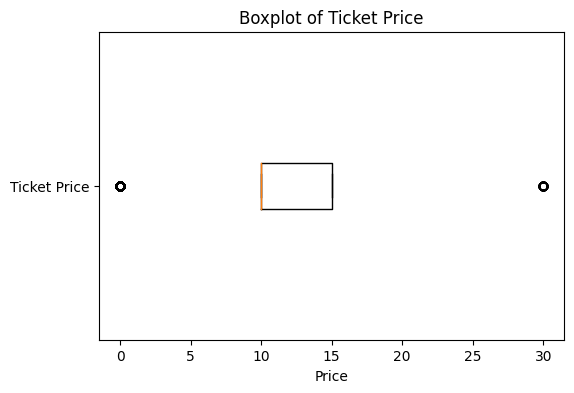

(                           customer_id transaction_date  ticket_price  \
 0     660c3305600895f32784a8922e4d6dab       2010/01/02          0.01   
 14    0f4e1d49e68e382f0fae735241d3461f       2010/08/19          0.01   
 15    0f4e1d49e68e382f0fae735241d3461f       2010/08/19         29.99   
 16    0f4e1d49e68e382f0fae735241d3461f       2010/09/18         29.99   
 17    0f4e1d49e68e382f0fae735241d3461f       2010/10/18         29.99   
 ...                                ...              ...           ...   
 1460  4ab1aab411cac804eed20196b694062c       2010/12/01          0.01   
 1463  f9e94a8c740618677835b25cf1ed4c92       2010/01/27          0.01   
 1476  1754b5524f94948b418771b48d86b4b0       2010/03/09          0.01   
 1487  2e7eb06364a45a21d9a41d7d3fe8984b       2010/12/21          0.01   
 1489  ba2f841b2caf0359d4e8618a2e4f29ee       2010/08/30          0.01   
 
        product  ticket_price_normalized  
 0        basic                      0.0  
 14    platinum         

In [63]:
# Visualizing potential outliers with a boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(transaction_cleaned['ticket_price'], vert=False, labels=['Ticket Price'])
plt.title('Boxplot of Ticket Price')
plt.xlabel('Price')
plt.show()

# Identifying outliers using the IQR method
Q1 = transaction_cleaned['ticket_price'].quantile(0.25)
Q3 = transaction_cleaned['ticket_price'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = transaction_cleaned[(transaction_cleaned['ticket_price'] < lower_bound) | (transaction_cleaned['ticket_price'] > upper_bound)]

# Displaying the outliers and the bounds
outliers, lower_bound, upper_bound

The boxplot suggests that there are numerous potential outliers in the ticket_price variable.

Upon applying the IQR method for outlier detection, we find:

* Lower Bound for Outlier Detection: $2.49

* Upper Bound for Outlier Detection: $22.49

There are 264 entries identified as outliers, primarily due to extremely low or high ticket_price values, which are either 0.01 or 29.99.



In [65]:
# Removing the outliers
transaction_no_outliers = transaction_cleaned[(transaction_cleaned['ticket_price'] >= lower_bound) & (transaction_cleaned['ticket_price'] <= upper_bound)]

# Verifying the operation
transaction_no_outliers.describe(), transaction_cleaned.shape, transaction_no_outliers.shape


(       ticket_price  ticket_price_normalized
 count   1231.000000              1231.000000
 mean      11.590325                 0.386268
 std        2.333454                 0.077834
 min        9.990000                 0.332889
 25%        9.990000                 0.332889
 50%        9.990000                 0.332889
 75%       14.990000                 0.499666
 max       14.990000                 0.499666,
 (1495, 5),
 (1231, 5))

The outliers have been successfully removed from the dataset. Here's a brief overview:

Original Data:
* Entries: 1495
* Ticket Price: Mean = $10.89, Min = 0.01, Max = 29.99

Data Without Outliers:
* Entries: 1231 (264 entries removed as outliers)
* Ticket Price: Mean = $11.59, Min = 9.99, Max = 14.99

### Step 7: Train/Test Split
We'll split the cleaned data (without outliers) into training and testing samples. A common practice is to allocate 80% of the data for training and 20% for testing, which we will adhere to in this instance. This division allows us to construct a model using the training data and validate its performance using the testing data.



In [66]:
train_data, test_data = train_test_split(transaction_no_outliers, test_size=0.2, random_state=42)

# Verifying the split
train_data.shape, test_data.shape

((984, 5), (247, 5))

###Step 8: Save to File
Upon creating the train/test split, we'll save the datasets into two separate CSV files for future use.

In [67]:
train_data.to_csv('/content/drive/MyDrive/Deep_learning/transactions_train.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/Deep_learning/transactions_test.csv', index=False)